# SVC iris 다중 분류
---

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 준비

In [152]:
X_train, X_test, y_train, y_test = my.get_iris(mode='bin')

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


### 정규화
- 표준화 (StandardScaler)
- 최소-최대 정규화 (MinMaxScaler)

In [153]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) # 컬럼별로 데이터의 최소, 최대를 계산
X_train_s = scaler.transform(X_train) # 정규화
y_train = y_train.values # 넘파이 배열로 변환

### 학습

In [154]:
from sklearn.svm import SVC

clf = SVC(random_state=2022, kernel='linear')
clf.fit(X_train_s, y_train)

SVC(kernel='linear', random_state=2022)

### 평가

In [155]:
clf.score(X_train_s, y_train) # 정확도

1.0

In [156]:
clf.coef_ # 기울기

array([[ 0.61113305, -0.81845101,  1.75675951,  1.3825968 ]])

In [157]:
clf.intercept_ # 절편

array([-1.22672043])

### 최종

In [158]:
X_test_s = scaler.transform(X_test) # 정규화
y_test = y_test.values # 넘파이 배열로 변환

In [159]:
clf.score(X_test_s, y_test)

1.0

### 예측

In [160]:
y_pred = clf.predict(X_test_s)

In [161]:
my.print_score(y_test, y_pred)

accuracy: 1.0
precision: 1.0
recall: 1.0


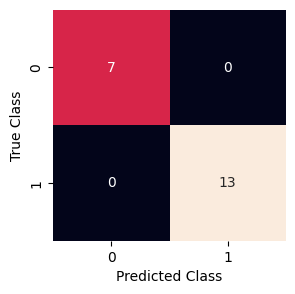

In [162]:
my.plot_confusion_matrix(y_test, y_pred)

# 다중분류

In [163]:
X_train,X_test,y_train,y_test = my.get_iris()

In [164]:
X_train.shape
y_train.shape
X_test.shape

(30, 4)

In [165]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) # 컬럼별로 데이터의 최소, 최대를 계산
X_train_s = scaler.transform(X_train) # 정규화
y_train = y_train.values # 넘파이 배열로 변환

In [166]:
from sklearn.svm import SVC

clf = SVC(random_state=2022)
clf.fit(X_train_s, y_train)

SVC(random_state=2022)

In [167]:
clf.score(X_train_s, y_train) # 정확도

0.9916666666666667

In [168]:
X_test_s = scaler.transform(X_test) # 정규화
y_test = y_test.values # 넘파이 배열로 변환

In [169]:
clf.score(X_test_s, y_test)

0.9666666666666667

In [170]:
y_pred = clf.predict(X_test_s)

In [171]:
my.print_score(y_test, y_pred,average='weighted')

accuracy: 0.9666666666666667
precision: 0.9703703703703703
recall: 0.9703703703703703


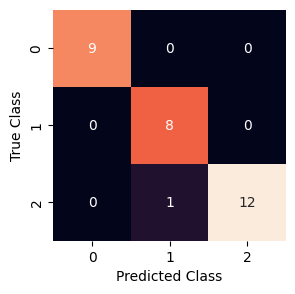

In [172]:
my.plot_confusion_matrix(y_test, y_pred)

In [173]:
# find a best model

### 모델 준비

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
names = ['linear','LinearSVC','poly','rbf','knn-5','knn-9']
models = [
    # 선형선을 찾는 svm은 같다.
    SVC(kernel='linear',C=1),
    LinearSVC(C=1,max_iter=1000),
    SVC(kernel='poly',degree=3),
    SVC(kernel='rbf',C=1,gamma=0.7),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=9)
]



In [175]:
scores = {}

for name,model in zip(names,models) :
    model.fit(X_train,y_train)
    s = model.score(X_train,y_train)
    print(name,s)
    scores[name]=s

linear 0.9916666666666667
LinearSVC 0.9666666666666667
poly 0.975
rbf 0.9916666666666667
knn-5 0.9666666666666667
knn-9 0.9833333333333333


C:\Users\007\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [176]:
scores

{'linear': 0.9916666666666667,
 'LinearSVC': 0.9666666666666667,
 'poly': 0.975,
 'rbf': 0.9916666666666667,
 'knn-5': 0.9666666666666667,
 'knn-9': 0.9833333333333333}

Text(0, 0.5, 'score')

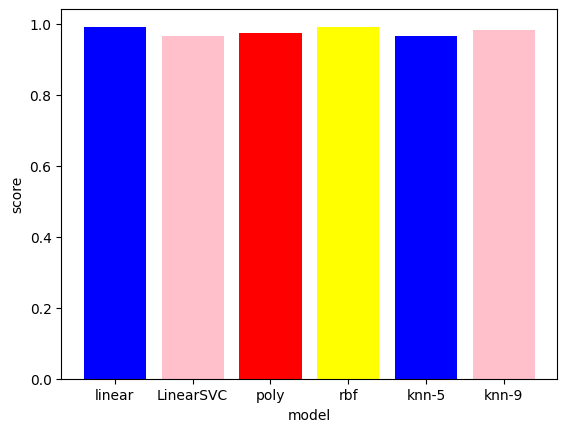

In [177]:
x = list(scores.keys())
y = list(scores.values())

plt.bar(x,y,color = ['blue','pink','red','yellow'])
plt.xlabel('model')
plt.ylabel('score')


### GridSearch

In [179]:
type(X_train_s),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [138]:
param_range = [0.001,0.01,0.1,1,10,100,1000]

params = [
    {
        # 어느 범위로 할건지
        'C' : param_range,
        'gamma' : param_range,
        'kernel' : ['rbf']
    },
    {
        'C' : param_range,
        'kernel' : ['linear']
    },
    {
        'C' : param_range,
        'degree' : [2,3], 
        'kernel' : ['poly']
    }
]

In [180]:
# grid search CV = cross validation
from sklearn.model_selection import GridSearchCV
# gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정한다.
# gamma가 점점 커지는데, 결정 경계가 결정 경계 가까이에 있는 데이터 샘플들에 영향을 크게 받기 때문에 점점 더 구불구불해지는 것을 알 수 있다.
# overfit 날수있다.
clf = SVC(random_state=2022)
gs = GridSearchCV(estimator=clf,
                  param_grid=params,
                 scoring='accuracy',
                 cv = 3,
                  # thread를 몇개나 돌릴지 정하는것
                  n_jobs = -1,
                  verbose=3
                 )
gs.fit(X_train_s,y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=SVC(random_state=2022), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [181]:
gs.best_estimator_

SVC(C=10, gamma=1, random_state=2022)

In [182]:
gs.best_score_

0.9833333333333334

In [183]:
gs.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [185]:
clf = gs.best_estimator_
clf.predict(X_test_s)

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2], dtype=int64)

### 재학습

In [187]:
clf = SVC(C= 10, gamma= 1, kernel='rbf',random_state = 2022)
clf.fit(X_train_s,y_train)

SVC(C=10, gamma=1, random_state=2022)

In [189]:
clf.score(X_train_s,y_train)

0.975

In [191]:
clf.score(X_test_s,y_test)

0.9333333333333333

In [150]:
### RandomizedSearch CV